In [261]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [262]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [263]:
print("dimensions of train: {}".format(train.shape))
print("dimensions of test: {}".format(test.shape))

dimensions of train: (891, 12)
dimensions of test: (418, 11)


In [264]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [265]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bailey, Mr. Percy Andrew",male,347082,B96 B98,S
freq,1,577,7,4,644


In [267]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [268]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\THASNIHAKEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

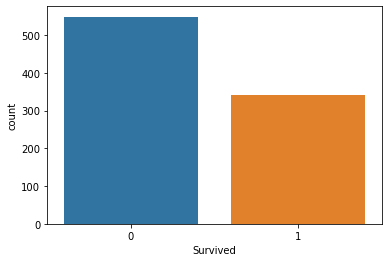

In [269]:
sns.countplot(train['Survived'])

C:\Users\THASNIHAKEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\THASNIHAKEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\THASNIHAKEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\T

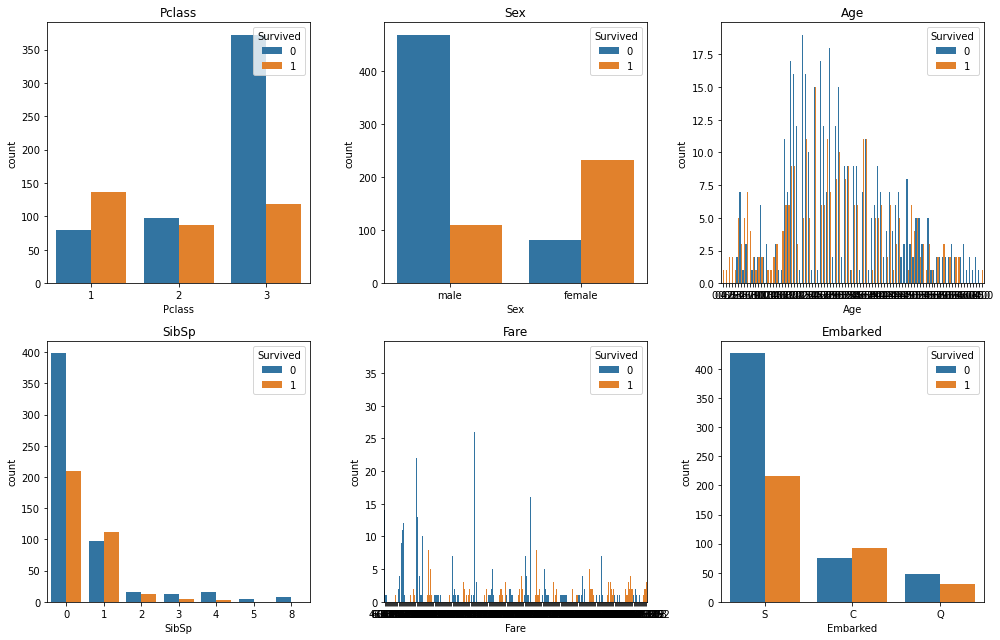

In [270]:
cols=['Pclass', 'Sex', 'Age', 'SibSp','Fare', 'Embarked']
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_rows*7,n_cols*3))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(train[cols[i]],hue=train['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
plt.tight_layout()

In [271]:
data=train.drop(['Ticket','Cabin','PassengerId'],axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [272]:
title=set()
for name in train["Name"]:
    title.add(name.split(",")[1].split(".")[0].strip())
print(title) 

{'Miss', 'Dr', 'the Countess', 'Rev', 'Ms', 'Mme', 'Lady', 'Jonkheer', 'Major', 'Col', 'Mr', 'Sir', 'Don', 'Capt', 'Mrs', 'Master', 'Mlle'}


In [273]:
titles={'Sir':"officer",'Mme':"normald",'Mr':"norm",'Master':"normald",'Don':"officer",'Miss':"normald",'Lady':"normald",'Mlle':"normald",'Col':"officer",'Ms':"normald",'the Countess':"royal",'Mrs':"normald",'Major':"officer",'Capt':"officer",'Dr':"officer",'Rev':"officer",'Jonkheer':"royal"}

In [274]:
data["Name"]=data["Name"].map(lambda name:name.split(",")[1].split(".")[0].strip())
data["Name"]=data.Name.map(titles)
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,norm,male,22.0,1,0,7.2500,S
1,1,1,normald,female,38.0,1,0,71.2833,C
2,1,3,normald,female,26.0,0,0,7.9250,S
3,1,1,normald,female,35.0,1,0,53.1000,S
4,0,3,norm,male,35.0,0,0,8.0500,S
5,0,3,norm,male,NaN,0,0,8.4583,Q
6,0,1,norm,male,54.0,0,0,51.8625,S
7,0,3,normald,male,2.0,3,1,21.0750,S
8,1,3,normald,female,27.0,0,2,11.1333,S
9,1,2,normald,female,14.0,1,0,30.0708,C


In [275]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [276]:
data.Sex=data.Sex.map({'female':0,'male':1})
data.Embarked=data.Embarked.map({'S':0,'Q':1,'C':2})
data.Name=data.Name.map({"royal":0,"normald":1,"officer":2,"norm":3})

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,3,1,22.0,1,0,7.2500,0.0
1,1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,1,0,26.0,0,0,7.9250,0.0
3,1,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,3,1,35.0,0,0,8.0500,0.0


In [277]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [278]:
data.dropna(inplace=True)

In [279]:
data.Age.mean()

29.64209269662921

In [280]:
data.Age.fillna(data.Age.mean(),inplace=True)

In [281]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,3,1,22.0,1,0,7.2500,0.0
1,1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,1,0,26.0,0,0,7.9250,0.0
3,1,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,3,1,35.0,0,0,8.0500,0.0


In [282]:
data["Age"]=round((data.Age.mean()/data.Age.std()))
data["Fare"]=round((data.Fare.mean()/data.Fare.std()))

In [283]:
data.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.0,712.000000,712.000000,712.0,712.000000
mean,0.404494,2.240169,2.141854,0.636236,2.0,0.514045,0.432584,1.0,0.404494
std,0.491139,0.836854,0.981311,0.481420,0.0,0.930692,0.854181,0.0,0.779038
min,0.000000,1.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,2.0,0.000000,0.000000,1.0,0.000000
50%,0.000000,2.000000,3.000000,1.000000,2.0,0.000000,0.000000,1.0,0.000000
75%,1.000000,3.000000,3.000000,1.000000,2.0,1.000000,1.000000,1.0,0.000000
max,1.000000,3.000000,3.000000,1.000000,2.0,5.000000,6.000000,1.0,2.000000


In [284]:
x_train,x_test,y_train,y_test=train_test_split(
    data.drop(["Survived"],axis=1),
    data.Survived,
    test_size=0.2,
    random_state=0,
    stratify=data.Survived
)

In [285]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

Y_pred=lr.predict(x_test)
accuracy_score(y_test,Y_pred)

0.8461538461538461

In [286]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [287]:
df=test.drop(['Ticket','Cabin','PassengerId'],axis=1)

In [288]:
title=set()
for name in train["Name"]:
    title.add(name.split(",")[1].split(".")[0].strip())
print(title) 

{'Miss', 'Dr', 'the Countess', 'Rev', 'Ms', 'Mme', 'Lady', 'Jonkheer', 'Major', 'Col', 'Mr', 'Sir', 'Don', 'Capt', 'Mrs', 'Master', 'Mlle'}


In [289]:
titles={'Sir':"officer",'Mme':"normald",'Mr':"norm",'Master':"normald",'Don':"officer",'Miss':"normald",'Lady':"normald",'Mlle':"normald",'Lady':"normald",'Mlle':"normald",'Col':"officer",'Ms':"normald",'the Countess':"royal",'Mrs':"normald",'Major':"officer",'Capt':"officer",'Dr':"officer",'Rev':"officer",'Jonkheer':"royal"}

In [290]:
df["Name"]=df["Name"].map(lambda name:name.split(",")[1].split(".")[0].strip())
df["Name"]=df.Name.map(titles)
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,norm,male,34.5,0,0,7.8292,Q
1,3,normald,female,47.0,1,0,7.0000,S
2,2,norm,male,62.0,0,0,9.6875,Q
3,3,norm,male,27.0,0,0,8.6625,S
4,3,normald,female,22.0,1,1,12.2875,S
5,3,norm,male,14.0,0,0,9.2250,S
6,3,normald,female,30.0,0,0,7.6292,Q
7,2,norm,male,26.0,1,1,29.0000,S
8,3,normald,female,18.0,0,0,7.2292,C
9,3,norm,male,21.0,2,0,24.1500,S


In [291]:
df.Sex=df.Sex.map({'female':0,'male':1})
df.Embarked=df.Embarked.map({'S':0,'Q':1,'C':2})
df.Name=df.Name.map({"royal":0,"normald":1,"officer":2,"norm":3})
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,3.0,1,34.5,0,0,7.8292,1
1,3,1.0,0,47.0,1,0,7.0000,0
2,2,3.0,1,62.0,0,0,9.6875,1
3,3,3.0,1,27.0,0,0,8.6625,0
4,3,1.0,0,22.0,1,1,12.2875,0


In [292]:
df.isnull().sum()

Pclass       0
Name         1
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [293]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [294]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [295]:
df.Name.fillna(df.Name.mean(),inplace=True)

In [296]:
df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [299]:
df["Age"]=round((df.Age.mean()/df.Age.std()))
df["Fare"]=round((df.Fare.mean()/df.Fare.std()))

In [300]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,3.0,1,2,0,0,1,1
1,3,1.0,0,2,1,0,1,0
2,2,3.0,1,2,0,0,1,1
3,3,3.0,1,2,0,0,1,0
4,3,1.0,0,2,1,1,1,0


In [301]:
pred=lr.predict(df)

In [302]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [303]:
len(pred)

418

In [304]:
submission=pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pred
    })
submission.to_csv("submission6_titanic.csv",index=False)

In [305]:
pred_df=pd.read_csv("submission6_titanic.csv")

In [306]:
pred_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

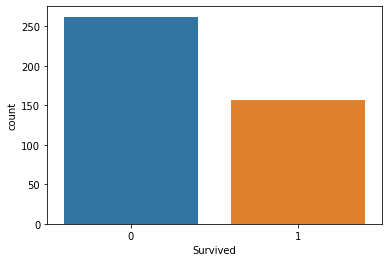

In [307]:
sns.countplot(x="Survived",data=pred_df)